# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

<img src="http://www.nextbit.it/img/diagrammi/classification01.jpg">

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
With classfication algorithms we try to predict discrete labels, while with regression we want to predict continous labels for our data.
In this example for a given student we want to decide whether an intervention is necessary (1) or not (0). This is a binary/discrete output, hence a binary classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [148]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [149]:
#Print table
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [150]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]-1

# TODO: Calculate passing students
n_passed = student_data[student_data['passed']=='yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data['passed']=='no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = float ( n_passed )/ n_students*100

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [151]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [152]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [153]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

**Answer: **
Intuitively, for a learned classifier to be able to generalize well to unseen data it should meet the following three conditions: (1) it should have been trained on 'enough' examples, (2) it should fit the training data (3) it should be 'simple'.

The dataset has about 139 unique values. I was recently at a conference about AI and Ralf, the director of machine learning at Amazon, said that they usually try to have at least one example for each unique value. We have 300 samples in our training set so we are in good shape.

I chose the following algorithms for my project:

** Naive Bayes: **

Naive Bayes model is used for the following three applications:
* SPAM Detection
* Text classification
* Hybrid Recommender Systems

One advantage of Naive Bayes is that it can be trained very fast compared to more sophisticated models. Since the Naive Bayes Classifier works with distributions (Gaussian, Bernoulli) one is also flexible enough to try different distributions to fit the data well. One downside of Naive Bayes that due to its simplisity it might not work well for very complex problem spaces.

I chose Naive Bayes because the algorithm only needs a small sample size to learn the necessary parameters. Since we only have information about 300 students in our training set this is important.

** SVM: **

Support Vector Machines can be applied in the following three circumstances:
* Credit Card Fraud
* Handwriting Detection
* Image Classification

Support Vector Machines maximize the margin between the different classes in a dataset, which allows this algorithm to generalize really well. The algorithm is also extremly flexible due to the different kernel functions available. The performance of Support Vector Machines starts to deteriorate when the feature space is much larger than the sample size.

I chose SVM's because we have more samples than unique features. Furthermore, if this algorithm performs well I intend to try different kernels with GridSearch.

** Boosting: **

Boosting can be used for Face Detection because it saves on computation cost and maintains accuracy compared to other classifiers.

One advantage of Boosting is that there are less parameters to tune: weak classifier, depth and learning rate. However, boosting can be sensitive to noisy data and outliers.

Since the student dataset is highly dimensional. The combination of the weak classifiers will be able to fit this highly dimensional dataset well. 

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [154]:
'''I modified these functions so that I didn't have to manually copy 
the results in the table provided.'''

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Return the results
    return {'time': end - start}

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Return the results
    return {'time': end - start, 'score': f1_score(target.values, y_pred, pos_label='yes')}


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    #Store Time and Score Information
    train_info = predict_labels(clf, X_train, y_train)
    test_info = predict_labels(clf, X_test, y_test)
    
    
    # Return all results necessary for one row in the table
    return {'Prediction Time (train)': round(train_info['time'], 4), 
            'Prediction Time (test)': round(test_info['time'], 4), 
            'F1 Score (train)': round(train_info['score'], 4), 
            'F1 Score (test)': round(test_info['score'], 4)}

def train_predict_samples(clf):
    df = pd.DataFrame(columns=['Prediction Time (train)', 
                               'Prediction Time (test)', 
                               'F1 Score (train)', 
                               'F1 Score (test)'], index=['100', '200', '300'])

    for size in [100, 200, 300]:
        df.loc[str(size)] = pd.Series(train_predict(clf, 
                                                X_train[:size], 
                                                y_train[:size], 
                                                X_test, 
                                                y_test))                 
    return df

def train_predict_all(clf):
    df = pd.DataFrame(columns=['Prediction Time (train)', 
                               'Prediction Time (test)', 
                               'F1 Score (train)', 
                               'F1 Score (test)'], index=['All'])

    info_all = train_predict(clf, X_train, y_train, X_test, y_test)
    
    df.loc['All'] = pd.Series(info_all)
    return df

def print_classifier_name(clf):
    print 'Classifier - {}'.format(clf.__class__.__name__)
    
# I copied this code snippet from the sklearn documentation and adjusted it for the specific use case
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(['no', 'yes']))
    plt.xticks(tick_marks, ['no', 'yes'], rotation=45)
    plt.yticks(tick_marks, ['no', 'yes'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def compute_confusion_matrix(clf):
    y_pred = clf.predict(X_test)
    return confusion_matrix(y_test, y_pred)
    

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [155]:
# TODO: Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.naive_bayes import GaussianNB
# from sklearn import model_B
from sklearn import svm
# from skearln import model_C
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = svm.SVC()
clf_C = AdaBoostClassifier(n_estimators=200)

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# TODO: Execute the 'train_predict' function for each classifier and each training set size
clf_A_info = train_predict_samples(clf_A)
clf_B_info = train_predict_samples(clf_B)
clf_C_info = train_predict_samples(clf_C)

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

Classifier - GaussianNB
[[10 26]
 [ 8 51]]


,Prediction Time (train),Prediction Time (test),F1 Score (train),F1 Score (test)
100,0.0097,0.0003,0.855,0.7481
200,0.0004,0.0002,0.8321,0.7132
300,0.0005,0.0002,0.8088,0.75


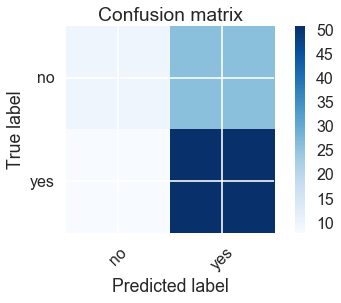

In [156]:
print_classifier_name(clf_A)

# Compute the Confusion Matrix
cm = compute_confusion_matrix(clf_A)
print cm

# Plotting the Confusion Matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(cm)

# Displaying the Table
clf_A_info.head()

Classifier - SVC
[[ 5 31]
 [ 4 55]]


,Prediction Time (train),Prediction Time (test),F1 Score (train),F1 Score (test)
100,0.0012,0.0009,0.8591,0.7838
200,0.0023,0.0016,0.8693,0.7755
300,0.0044,0.0016,0.8692,0.7586


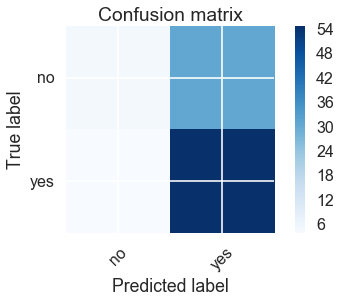

In [157]:
print_classifier_name(clf_B)

# Computing the Confusion Matrix
cm = compute_confusion_matrix(clf_B)
print cm

# Plotting the Confusion Matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(cm)

# Displaying the Table
clf_B_info.head()

Classifier - AdaBoostClassifier
[[16 20]
 [10 49]]


,Prediction Time (train),Prediction Time (test),F1 Score (train),F1 Score (test)
100,0.014,0.0176,1,0.7317
200,0.0161,0.0138,0.9091,0.7669
300,0.0181,0.0134,0.8811,0.7656


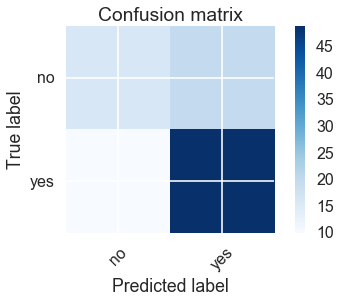

In [158]:
print_classifier_name(clf_C)

# Computing the Confusion Matrix
cm = compute_confusion_matrix(clf_C)
print cm

# Plotting the Confusion Matrix
np.set_printoptions(precision=2)
plot_confusion_matrix(cm)

# Displaying the table
clf_C_info.head()

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Chosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **
In my opinion not only the peformance and training/prediction time matters, but also which types of mistakes are made. For some students it may be catastrophic, when they are predicted to graduate, but are actually at risk - this would be a false positive.
To evaluate the models based on this metric I implemented a confusion matrix - the false positives are in the top right corner. The model, that performs best, while also minimizing the number of false positives is the model based on the AdaBoostClassifier. Furthermore, this model also performs the best on the majority of students (i.e. 300 samples).
The disadvantage of this model is the longer prediction time.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. For example if you've chosen to use a decision tree or a support vector machine, how does the model go about making a prediction?*

**Answer: **

In the problem at hand we are trying to decide whether students will graduate using an algorithm. Let's think about this if we were using teachers A, B, C, D and E instead for a moment. 
Each teacher records their best guess about each student, using all the information they have on their students.At the end of the year they know whether the actually students graduated. It turns out that maybe teacher A's guesses proved more accurate than the guesses of teacher B. It also turned out that when theachers C and D agreed they were usually right. The guesses of teacher E turned out to be mostly inaccurate though. In the next year to accomodate what they learned accurate for students who take science classes, while teacher E's guesses are very accurate for students who take a lot of college prep classes. In the next year the weights of the teachers guesses are changed to accomodate for their repspective area of expertise. Ada Boosting works similarly.

The AdaBoosting algorithm starts by plotting all the data and finding a straight line to divide our dataset into students who will and will not graduate. After the first iteration the points that were in the wrong group (i.e. the algorithm got wrong) are assigned a higher importance (weight). In the next iteration the algorithm tries to find a better line to divide the dataset focusing on the more important points. The line dividing the dataset is called a weak classifier. This is repeated a lot of times and each time the importance of the point is updated. Essentially in the first stage we get houndreds or even thousands of opinions (weak classifiers) about in which group a given students should belong - in our analogy each weak classifier would represent a teachers opinion. These are by no means perfect, in fact they are often only a little bit better than random guessing.

In the next stage we have to figure out which combination of these opinions ist most effective at predicting the students group and combine all of them into one model. For each weak classifier we can calculate the error by multiplying the importance weight of each point that was misclassified times one. We combine these opinions by giving the best opinions (i.e. with lowest error) the most influence in the final model - similarly to how the weights of the teachers guesses changed at the end of the year. This is done using a weighted sum.

The final model is a hyperplane that divides the highly dimensional space of all the features of each individual students into two sides. This plane is not linear - in fact it has a very complex shape with sharp edges. When a new student comes along and the students datapoint is 'graphed' in this high dimensional space it falls on either side - this is the output of the model. Below you can seen an image of how a model in a simple two-dimensional case divided the dataset into two groups:
<img src="http://scikit-learn.org/stable/_images/plot_adaboost_twoclass_001.png">

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


[Parallel(n_jobs=8)]: Done 330 tasks      | elapsed:   10.0s
[Parallel(n_jobs=8)]: Done 705 tasks      | elapsed:   21.0s
[Parallel(n_jobs=8)]: Done 1205 tasks      | elapsed:   37.8s
[Parallel(n_jobs=8)]: Done 1905 tasks      | elapsed:  1.0min
[Parallel(n_jobs=8)]: Done 2805 tasks      | elapsed:  1.5min
[Parallel(n_jobs=8)]: Done 3750 out of 3750 | elapsed:  2.1min finished


Classifier - AdaBoostClassifier
[[11 25]
 [ 3 56]]


,Prediction Time (train),Prediction Time (test),F1 Score (train),F1 Score (test)
All,0.0014,0.0011,0.8359,0.8


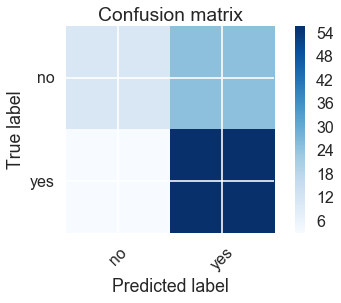

In [160]:
# TODO: Import 'gridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Implemented stratified K Fold Cross Validation
from sklearn import cross_validation

skf = cross_validation.StratifiedShuffleSplit(y_train, n_iter=5, random_state=0)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': list(np.arange(1, 150, 10)), 
              'learning_rate': list(np.arange(0.5,1,0.02)), 
              'algorithm': ['SAMME', 'SAMME.R'], 
              'random_state': [0]}

# TODO: Initialize the classifier
clf = AdaBoostClassifier()

# TODO: Make an f1 scoring function using 'make_scorer' 
# Greater is Better for F1 --> Don't change default
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, 
                        param_grid=parameters, 
                        scoring=f1_scorer, 
                        n_jobs=8, 
                        verbose=1, 
                        cv=skf)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Stats for the GridSearch Model
print_classifier_name(clf)
cm = compute_confusion_matrix(clf)
print cm
np.set_printoptions(precision=2)
plot_confusion_matrix(cm)

clf_info = train_predict_all(clf)
clf_info.head()

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    8.6s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:   19.3s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:   35.1s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:   53.4s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=16)]: Done 2418 tasks      | elapsed:  1.9min
[Parallel(n_jobs=16)]: Done 3168 tasks      | elapsed:  2.4min
[Parallel(n_jobs=16)]: Done 4018 tasks      | elapsed:  3.0min
[Parallel(n_jobs=16)]: Done 4968 tasks      | elapsed:  3.7min
[Parallel(n_jobs=16)]: Done 5000 out of 5000 | elapsed:  3.7min finished


Classifier - AdaBoostClassifier
[[10 26]
 [ 5 54]]


,Prediction Time (train),Prediction Time (test),F1 Score (train),F1 Score (test)
All,0.0158,0.01,0.8478,0.777


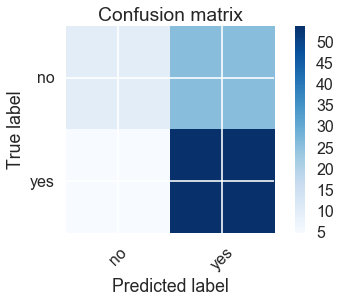

In [161]:
'''I wanted to search over a larger parameter space.
But I also didn't want to deploy this to a high powered machine.
So I decided to implement RandomSearchCV'''

clf = AdaBoostClassifier()

# Implemented Cross Validation
skf_random = cross_validation.StratifiedShuffleSplit(y_train, n_iter=10, random_state=0)

parameters_random = {'n_estimators': list(np.arange(1, 200, 5)), 
              'learning_rate': list(np.arange(0.1,1,0.02)), 
              'algorithm': ['SAMME', 'SAMME.R'], 
              'random_state': [0]}

# Optional: Using a higher number of parameters with RandomSearchCV
n_iter_search = 500

random_search = RandomizedSearchCV(clf, 
                                   param_distributions=parameters_random,
                                   n_iter=n_iter_search, 
                                   scoring=f1_scorer, 
                                   cv=skf_random, 
                                   n_jobs=16,
                                   verbose=1)

# Optional: RandomSearch
random_search = random_search.fit(X_train, y_train)

# Get the estimator
clf_random = random_search.best_estimator_

# Stats for the RandomSearch Model
print_classifier_name(clf_random)
cm_random = compute_confusion_matrix(clf_random)
print cm_random
np.set_printoptions(precision=2)
plot_confusion_matrix(cm_random)
clf_random_info = train_predict_all(clf_random)
clf_random_info.head()

Important features to the Model ranked by importance:
failures
absences
goout
freetime
Mjob_health
Dalc
Fedu
Mjob_services
studytime
age


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,Feature ID,Feature Importance
33,33.0,0.234668
48,48.0,0.219856
44,44.0,0.142470
43,43.0,0.117175
15,15.0,0.070287
45,45.0,0.044846
13,13.0,0.034177
17,17.0,0.033093
32,32.0,0.023160
5,5.0,0.021119


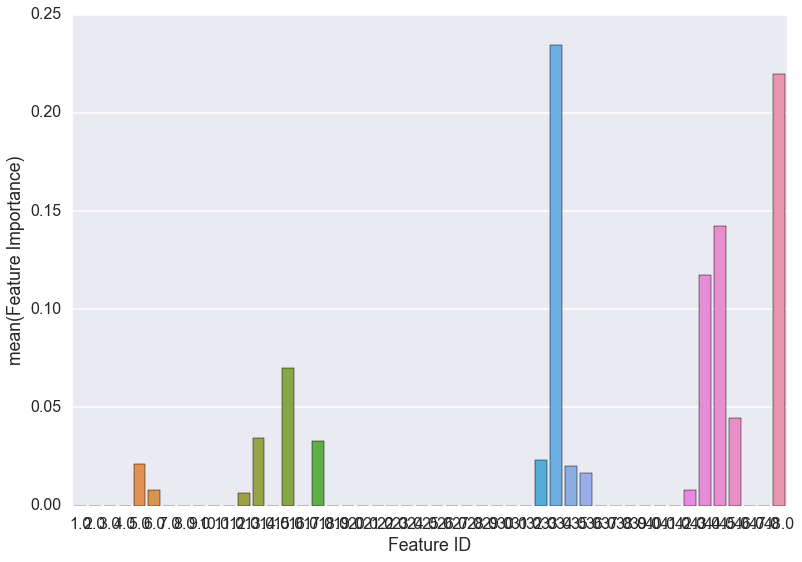

In [146]:
#Exploring the Feature Importance
import seaborn

# Creating DataFrame for visualiztion
df = pd.DataFrame(columns=['Feature ID', 
                           'Feature Importance'])

# Filling DataFrame
index = int(1)
for feature in clf_random.feature_importances_:
    df.loc[str(index)] = pd.Series({'Feature ID': index, 
                                    'Feature Importance':feature})
    index = index + 1
    
df

#Plotting and printing important features
seaborn.set_context('poster')
seaborn.barplot(x='Feature ID', y='Feature Importance', data=df)
df = df.sort_values(['Feature Importance'], ascending=[0])[:10]

print 'Important features to the Model ranked by importance:'

for feature in df['Feature ID']:
    print X_all.columns.values[feature-1]

df

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **
With GridSearch I was able to improve the performance on the test set by 1% compared to the untuned model. Using a larger parameter space and RandomSearchCV I was able to improve the model by another 1% to 0.7883 and reduced the number of false positives. When I implemented the larger parameter space into GridSearchCV I was able to achieve almost the same score. Using cross validation I was only able to marginally increase the score to 0.7887.

What is notable is that the number of false positives actually increased in the tuned model, while the number of false negatives decreased quite a lot. Although the increase in false positives is certainly bad, the drastic decrease in false negatives is really good because it saves the school costs, since there are fewer unnecessary interventions. This type of tradeoff is something the school board would have to decide on.

I also explored the features that had the most impact on the final model. I think the selected features like failures and absences are an intuitive indicator for student success.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.